<a href="https://colab.research.google.com/github/paulrobustelli/CHEM101.6/blob/main/Butane_OpenMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hello there!**

This is a Jupyter notebook for running Molecular Dynamics (MD) simulations of Alkanes using the OpenMM engine 

---
---
# **Setting the environment for MD calculation**

Firstly, we need to install all necessary libraries and packages for our simulation. The main packages we will be installing are:

1.    Anaconda (https://docs.conda.io/en/latest/miniconda.html)
2.    OpenMM (https://openmm.org/)
3.    Mdtraj (https://www.mdtraj.org/1.9.8.dev0/index.html)
5.    Numpy (https://numpy.org/)
6.    Matplotlib (https://matplotlib.org/)


In [32]:
import sys
import openmm as mm
from openmm import *
from openmm.app import *
from openmm.unit import *
import numpy as np
import os
import matplotlib.pyplot as plt


We're going to set-up a directory on our desktop to sore the input files needed for this simulation. 

These files are a pdb and a force field file for butane and ethane 

I'm going to make my course directory:
"/Users/paulrobustelli/desktop/Chem101_S24"

I made a subdirectory called: "Exercise0"

and another subdirectory "data":   
"/Users/paulrobustelli/desktop/Chem101_S24/Chem101_S24Exercise0/data"

and another for our output - commonly called an out directory or "outdir"
"/Users/paulrobustelli/desktop/Chem101_S24/Chem101_S24Exercise0/outdir"


In [33]:
workdir='/Users/paulrobustelli/Desktop/Chem101_S24/Exercise0/'
datadir='/Users/paulrobustelli/Desktop/Chem101_S24/Exercise0/data/'
outdir='/Users/paulrobustelli/Desktop/Chem101_S24/Exercise0/outdir/'

In [34]:
PDB_file_name = datadir+'butane.pdb'
forcefield_file_name = datadir+'butane.gaff2.xml' 

In [35]:
print(PDB_file_name)
print(forcefield_file_name)

/Users/paulrobustelli/Desktop/Chem101_S24/Exercise0/data/butane.pdb
/Users/paulrobustelli/Desktop/Chem101_S24/Exercise0/data/butane.gaff2.xml


In [36]:
pdb = mm.app.PDBFile(PDB_file_name)
forcefield = mm.app.ForceField(forcefield_file_name)

In [37]:
pdb

In [38]:
forcefield

In [39]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=mm.app.NoCutoff, constraints=mm.app.HBonds)
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picosecond, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

In [40]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.797528692127867 kJ/mol
Potential energy after minimization is 5.295271861905613 kJ/mol


In [41]:
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picoseconds, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)

print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.295271861905613 kJ/mol
Potential energy after minimization is 5.295054161663416 kJ/mol


In [29]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,39.63046024208943,170.97113789051178
200,53.77377213130053,386.9256366817575
300,42.3102653189851,335.1173919414603
400,53.35312652583953,231.19155969444006
500,49.6970880260358,367.20350915063904
600,40.67378682381542,291.5085899619967
700,40.46442775052494,370.4875440797755
800,42.345833692935734,308.5021670765309
900,33.16433850688995,193.6605020769733
1000,44.25706761671205,220.72080460612526
1100,40.56722140764904,329.78334910832467
1200,33.72767536028663,337.49151904097704
1300,32.429703842505276,365.3900521768836
1400,62.23794617244271,387.866158495365
1500,54.76684244150652,355.7892687813295
1600,49.60117819240676,364.011471166845
1700,59.63820841151556,210.66533088957146
1800,50.65830444584702,252.4869559454117
1900,40.00164606286971,264.19105038933924
2000,47.4036618993091,206.58596954137894
2100,44.20729372815816,299.19026798611094
2200,32.866224493691966,457.0726270031902
2300,33.08170414505993,329.

In [46]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(10000)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
10011000,37.887174946035174,482.4960200571265
10012000,30.097636622551725,541.9143019332372
10013000,57.05327538883675,337.2438023127467
10014000,43.8098082705706,199.26931970113696
10015000,50.917042695362866,365.45924828846523
10016000,39.963656480433535,341.7394750191856
10017000,59.23851962434422,249.2427505787292
10018000,29.47383488692597,386.5630013328472
10019000,33.531884109883904,359.46021786868295
10020000,37.17925303623783,164.21665082691035


In [47]:
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.DCDReporter(outdir+'butane_test.dcd', 100))

# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
10250000,20500.000003258898,71.68951378541142,255.1369785422144,0
10500000,21000.00000336076,46.62101891739499,250.924329147321,3.35e+04
10750000,21500.000003462625,52.7614764536768,219.82158137131557,3.39e+04
11000000,22000.000003564488,43.41214359665969,151.54931516345783,3.39e+04
11250000,22500.00000366635,28.25512536918349,350.45815024709816,3.4e+04
11500000,23000.000003768215,31.971969576645883,311.56696017458637,3.4e+04
11750000,23500.00000387008,27.742307486548718,290.3866538154677,3.41e+04
12000000,24000.00000397194,29.546642563865312,299.5268605215596,3.41e+04
12250000,24500.000004073805,33.789893540751066,425.17956443452414,3.41e+04
12500000,25000.00000417567,44.969621933783316,282.5964713522212,3.4e+04
12750000,25500.000004277532,33.74887629263817,325.79768428690005,3.4e+04
13000000,26000.000004379395,65.56232621414534,265.60388986845726,3.4e+04
13250000,26500.0000044812

In [55]:
import mdtraj as md
traj = md.load(outdir+'butane_test.dcd', top=PDB_file_name)
traj

<mdtraj.Trajectory with 100000 frames, 14 atoms, 1 residues, without unitcells at 0x146a7ef90>

In [59]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,NBU,0,
1,2,H11,H,1,NBU,0,
2,3,H12,H,1,NBU,0,
3,4,H13,H,1,NBU,0,
4,5,C2,C,1,NBU,0,
5,6,H21,H,1,NBU,0,
6,7,H22,H,1,NBU,0,
7,8,C3,C,1,NBU,0,
8,9,H31,H,1,NBU,0,
9,10,H32,H,1,NBU,0,


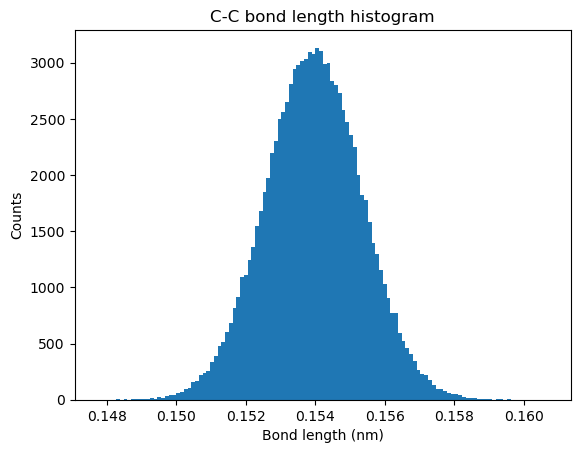

In [60]:
bond_indices = [4, 7] # atoms to define the bond length
bond_length = md.compute_distances(traj, [bond_indices])

bondcounts, binedges, otherstuff = plt.hist(bond_length, bins=120)
plt.title('C-C bond length histogram')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()

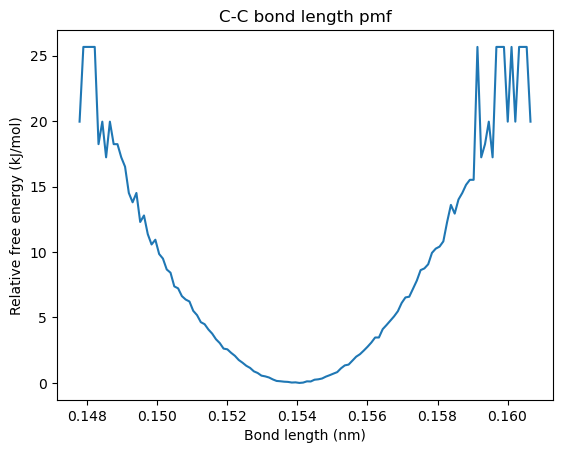

In [61]:
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
bondcounts[bondcounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(bondcounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.xlabel('Bond length (nm)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.title('C-C bond length pmf')
plt.show()

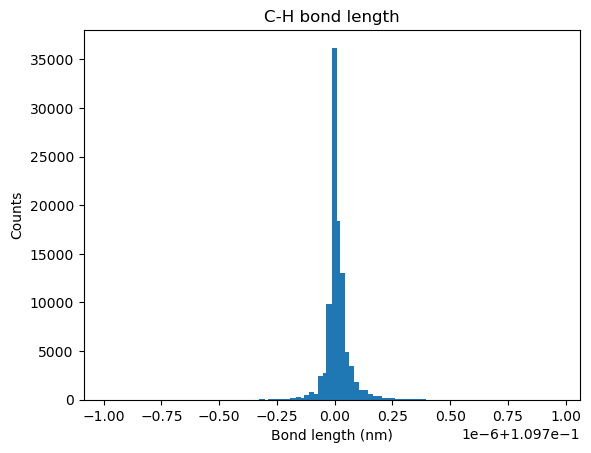

In [62]:
bond_indices = [4, 5] # many possibilities!
bondlength = md.compute_distances(traj, [bond_indices])

lengthcounts, binedges, otherstuff = plt.hist(bondlength, bins=100)
plt.title('C-H bond length')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()

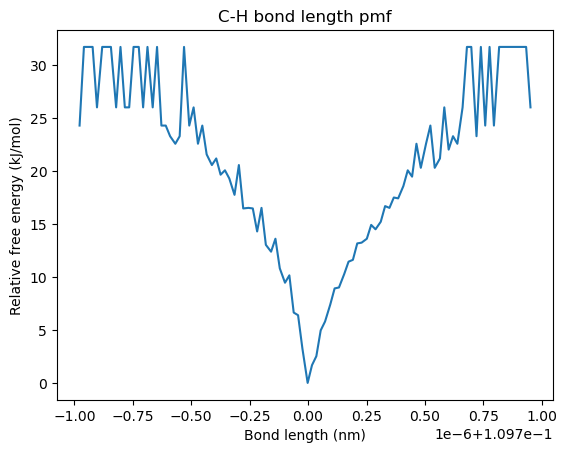

In [63]:
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
lengthcounts[lengthcounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(lengthcounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.xlabel('Bond length (nm)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.title('C-H bond length pmf')
plt.show()

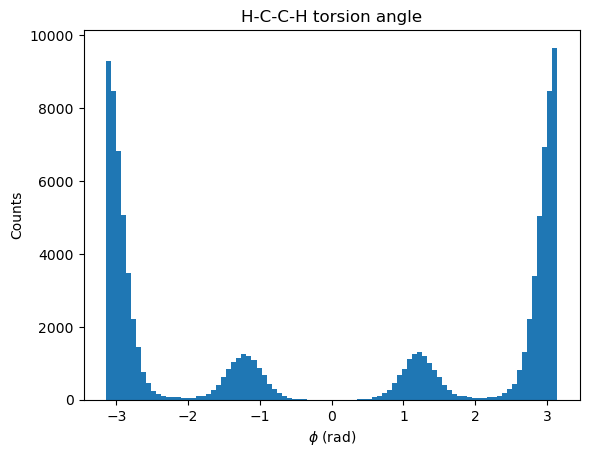

In [64]:
phi_indices = [0, 4, 7, 10] # atoms to define the torsion angle
phi = md.compute_dihedrals(traj, [phi_indices])

phicounts, binedges, otherstuff = plt.hist(phi, bins=90) # create a histogram with 90 bins
plt.title('H-C-C-H torsion angle')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Counts')
plt.show()

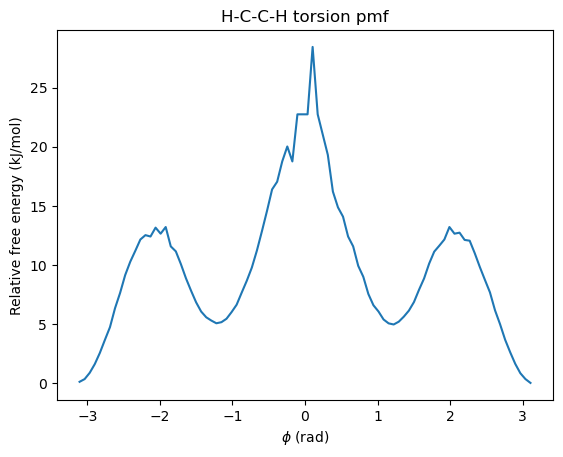

In [65]:
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature
phicounts[phicounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(phicounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

bincenters = (binedges[1:] + binedges[:-1])/2 # compute centers of histogram bins

plt.plot(bincenters, pmf)
plt.title('H-C-C-H torsion pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()

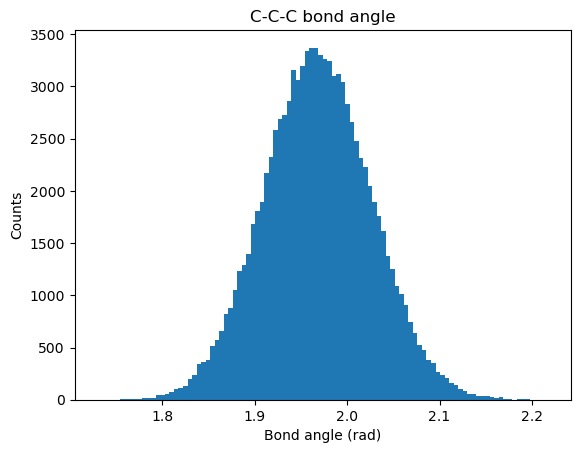

In [69]:
angle_indices = [0, 4, 7] # or could do [4, 7, 10]
bondangle = md.compute_angles(traj, [angle_indices])

anglecounts, binedges, otherstuff = plt.hist(bondangle, bins=100)
plt.title('C-C-C bond angle')
plt.xlabel('Bond angle (rad)')
plt.ylabel('Counts')
plt.show()

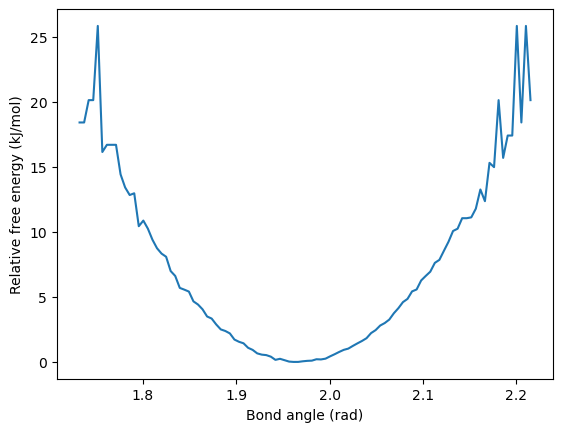

In [70]:
anglecounts[anglecounts==0] = 0.1
pmf = -kB*Temp*np.log(anglecounts)
pmf = pmf - np.min(pmf)

bincenters = (binedges[1:] + binedges[:-1])/2


plt.plot(bincenters, pmf)
plt.xlabel('Bond angle (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()